In [ ]:
%pip install networkx">=2.5"
%pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
educacao = ctrl.Antecedent(np.arange(0, 16, 1), 'educacao')
experiencia = ctrl.Antecedent(np.arange(0, 26, 1), 'experiencia')
salario = ctrl.Consequent(np.arange(20, 201, 1), 'salario')

educacao['baixa'] = fuzz.gaussmf(educacao.universe, 2.5, 0.5)
educacao['media'] = fuzz.gaussmf(educacao.universe, 7.5, 0.5)
educacao['alta'] = fuzz.gaussmf(educacao.universe, 12.5, 0.5)

experiencia['baixa'] = fuzz.gaussmf(experiencia.universe, 5.0, 0.5)
experiencia['media'] = fuzz.gaussmf(experiencia.universe, 15.0, 0.5)
experiencia['alta'] = fuzz.gaussmf(experiencia.universe, 20.0, 0.5)

salario['muito baixo'] = fuzz.gaussmf(salario.universe, 40.0, 0.5)
salario['baixo'] = fuzz.gaussmf(salario.universe, 60.0, 0.5)
salario['medio'] = fuzz.gaussmf(salario.universe, 100.0, 0.5)
salario['alto'] = fuzz.gaussmf(salario.universe, 150.0, 0.5)
salario['muito alto'] = fuzz.gaussmf(salario.universe, 180.0, 0.5)

In [4]:
regra1 = ctrl.Rule(educacao['baixa'] & experiencia['baixa'], salario['muito baixo'])
regra2 = ctrl.Rule(educacao['baixa'] & experiencia['media'], salario['baixo'])
regra3 = ctrl.Rule(educacao['baixa'] & experiencia['alta'], salario['medio'])
regra4 = ctrl.Rule(educacao['media'] & experiencia['baixa'], salario['baixo'])
regra5 = ctrl.Rule(educacao['media'] & experiencia['media'], salario['medio'])
regra6 = ctrl.Rule(educacao['media'] & experiencia['alta'], salario['alto'])
regra7 = ctrl.Rule(educacao['alta'] & experiencia['baixa'], salario['medio'])
regra8 = ctrl.Rule(educacao['alta'] & experiencia['media'], salario['alto'])
regra9 = ctrl.Rule(educacao['alta'] & experiencia['alta'], salario['muito alto'])

164.93269630856898


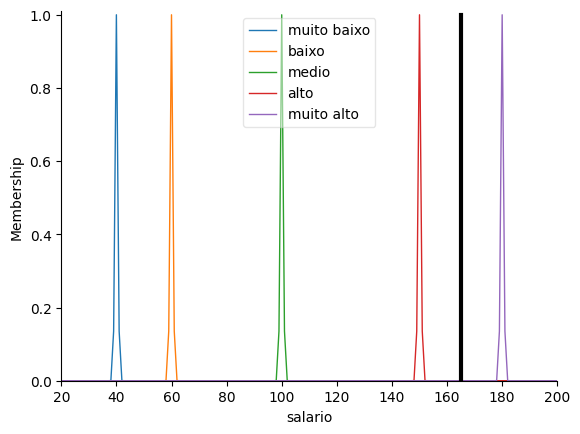

In [11]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5,
                                       regra6, regra7, regra8, regra9])
simulacao = ctrl.ControlSystemSimulation(sistema_controle)

simulacao.input['educacao'] = 10
simulacao.input['experiencia'] = 18.6

simulacao.compute()

print(simulacao.output['salario'])
salario.view(sim=simulacao)